# Description

This notebook trains, tests and creates plots for the base autoencoder model with 4 hidden layers each for the encoder and decoder, and the latent space is of dimensions 3. 

* This is the **same** model as in Eric Wulff and Erik Wallin's codes for 4-momentum data compression. 

* Tanh activatation is used for the hidden layers as the data is normalized.

*The data used in this notebook was **customly normalized**. Refer 4D_data_normalization.ipynb for further details.*

*Please note that to generate the train-validation loss plot, the test set is treated as the validation set, which theoretically is incorrect. However, I did not use the test set performance to determine the training schedule, so except for the loss plot, the test set is independent.*

### Load packages

In [1]:
import sys
BIN = 'utils/'
sys.path.append(BIN)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.utils.data
import torch.optim as optim
from torch.autograd import Variable

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

import fastai
from fastai.callbacks import ActivationStats
from fastai import data_block, basic_train, basic_data

import matplotlib as mpl
import my_matplotlib_style as ms
mpl.rc_file(BIN + 'my_matplotlib_rcparams')
%matplotlib inline

In [2]:
from utils import plot_activations
from nn_utils import AE_3D_200

### Check for gpu

In [3]:
torch.cuda.is_available()

True

***Comment if you training is to be done on a CPU***

In [4]:
fastai.torch_core.defaults.device = 'cuda'

## Load data

In [5]:
train = pd.read_pickle('../datasets/custom_normalized_train_4D_100_percent').astype(np.float32)
test = pd.read_pickle('../datasets/custom_normalized_test_4D_100_percent').astype(np.float32)
n_features = len(train.loc[0])

train.head(10)

,m,pt,phi,eta
132784,0.380062,0.035362,0.522339,0.228585
99666,0.414901,0.029518,-0.893519,0.042731
26629,0.693969,0.774339,-0.649413,0.232659
80473,0.665762,0.802212,-0.547034,0.534185
48229,0.417665,0.010274,0.974090,-0.231774
61832,0.477525,0.147764,-0.987571,0.018363
26867,0.707544,0.844371,0.824177,-0.259828
46232,0.396910,0.010005,-0.645799,-0.378682
44194,0.412968,0.136518,0.901019,-0.349310
59782,0.494671,0.100436,0.448154,-0.519982


### Create database for training

In [6]:
train_x = train
test_x = test
train_y = train_x  # y = x since we are building and AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values), torch.tensor(train_y.values))
valid_ds = TensorDataset(torch.tensor(test_x.values), torch.tensor(test_y.values))

In [7]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [8]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs=8192)

In [9]:
db = basic_data.DataBunch(train_dl, valid_dl)
db

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f3a29262278>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f3a29262208>;

Test: None

## Model definition

In [10]:
model = AE_3D_200()

### Loss = MSE

In [11]:
loss_func = nn.MSELoss()

### Training parameters

In [12]:
bn_wd = False  # Don't use weight decay fpr batchnorm layers
true_wd = True  # wd will be used for all optimizers
wd = 1e-6
learn = basic_train.Learner(data=db, model=model, loss_func=loss_func, wd=wd, callback_fns=ActivationStats, bn_wd=bn_wd, true_wd=true_wd)

### Find learning rate

In [13]:
from fastai import train as tr
tr.lr_find(learn)

epoch,train_loss,valid_loss,time
0,0.248213,#na#,00:01
1,0.247118,#na#,00:01
2,0.237329,#na#,00:01
3,0.196406,#na#,00:01
4,0.163824,#na#,00:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


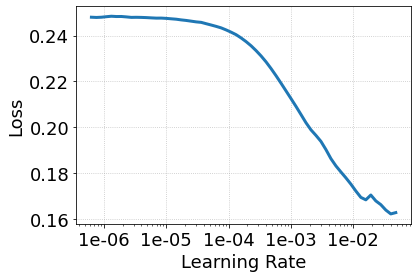

In [14]:
learn.recorder.plot()

### Start training

In [15]:
lr = 1e-6
learn.fit(1, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.247664,0.248681,00:01


### Train for 10 epochs with high learning rate

In [16]:
lr = 1e-3
learn.fit(10, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.122051,0.068756,00:02
1,0.085783,0.046773,00:01
2,0.064665,0.029856,00:01
3,0.048448,0.006650,00:01
4,0.034548,0.003635,00:02
5,0.025131,0.002676,00:02
6,0.018621,0.002088,00:01
7,0.014018,0.001720,00:02
8,0.010701,0.001514,00:01
9,0.008298,0.001618,00:02


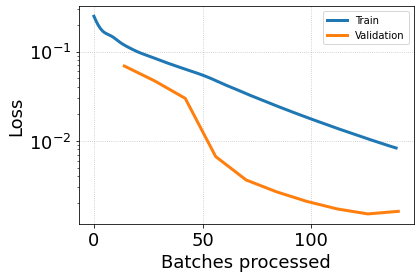

In [17]:
learn.recorder.plot_losses()
plt.yscale('log')

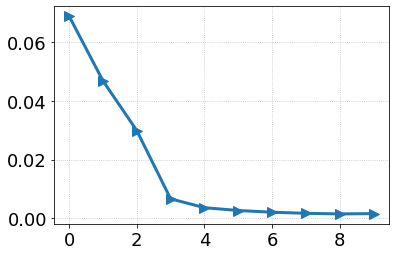

In [18]:
plt.plot(learn.recorder.val_losses, marker='>')

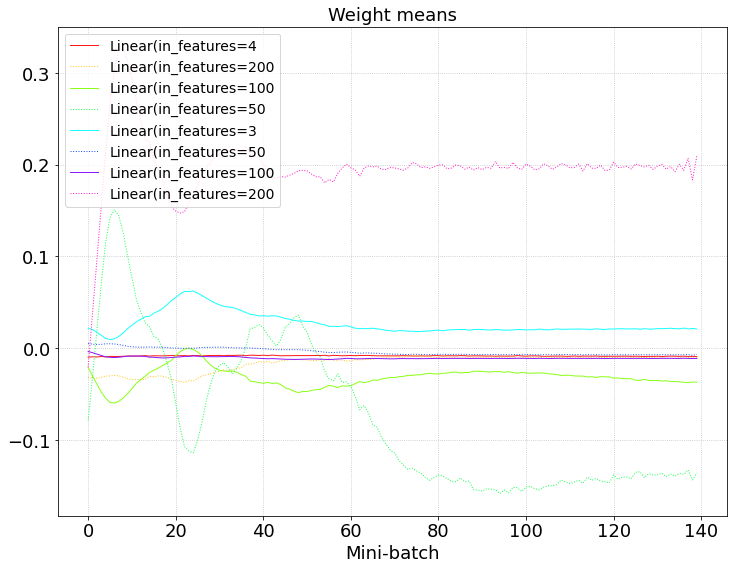

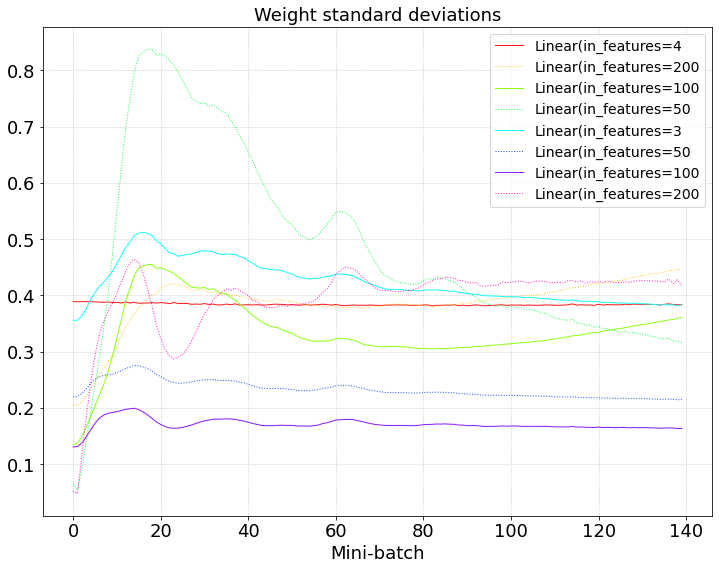

In [19]:
plot_activations(learn)

In [20]:
learn.save('AE_3D_200_no1cycle_custom_norm')

### Train for 10 more epochs with lower learning rate

In [21]:
lr = 1e-4
learn.fit(10, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.001439,0.001361,00:02
1,0.001395,0.001357,00:02
2,0.001374,0.001341,00:02
3,0.001361,0.001327,00:02
4,0.001346,0.001314,00:01
5,0.001334,0.001302,00:02
6,0.001324,0.001289,00:01
7,0.001313,0.001276,00:02
8,0.001300,0.001263,00:01
9,0.001288,0.001250,00:01


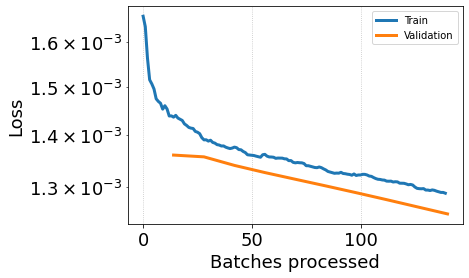

In [22]:
learn.recorder.plot_losses()
plt.yscale('log')

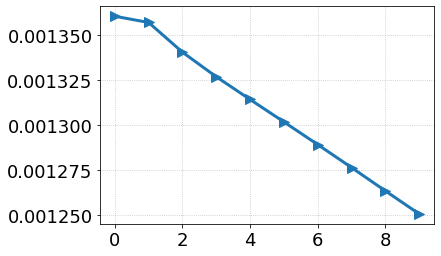

In [23]:
plt.plot(learn.recorder.val_losses, marker='>')
#plt.yscale('log')

In [24]:
learn.save('AE_3D_200_no1cycle_custom_norm')

### Train for 1000 more epochs at even lower LR

In [26]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000757,0.000750,00:02
1,0.000758,0.000750,00:02
2,0.000758,0.000750,00:02
3,0.000757,0.000750,00:02
4,0.000757,0.000750,00:02
5,0.000757,0.000750,00:02
6,0.000757,0.000750,00:02
7,0.000757,0.000750,00:02
8,0.000757,0.000750,00:02
9,0.000757,0.000750,00:02


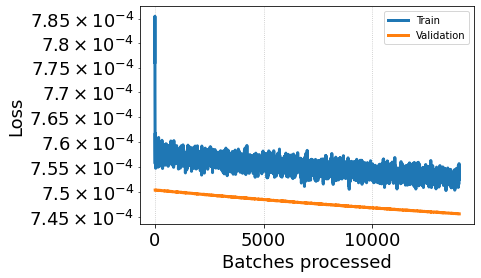

In [27]:
learn.recorder.plot_losses()
plt.yscale('log')

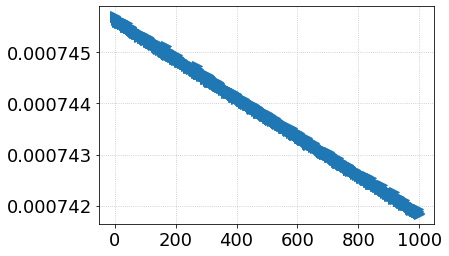

In [38]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
# plt.yscale('log')

In [29]:
learn.save('AE_3D_200_no1cycle_custom_norm')

### Train for 1000 more epochs at even lower LR

In [30]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000754,0.000746,00:02
1,0.000754,0.000746,00:02
2,0.000753,0.000746,00:02
3,0.000753,0.000746,00:02
4,0.000752,0.000746,00:02
5,0.000752,0.000746,00:02
6,0.000752,0.000746,00:02
7,0.000752,0.000746,00:02
8,0.000753,0.000746,00:02
9,0.000753,0.000746,00:02


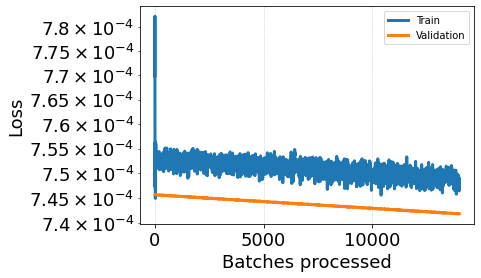

In [31]:
learn.recorder.plot_losses()
plt.yscale('log')

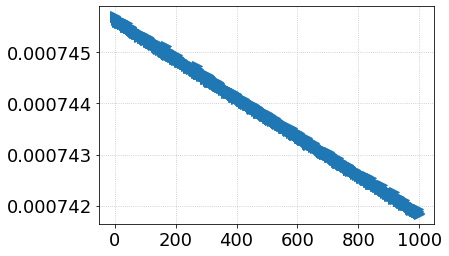

In [32]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [33]:
learn.save('AE_3D_200_no1cycle_custom_norm')

### 1000 more ..

In [39]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000748,0.000742,00:02
1,0.000749,0.000742,00:02
2,0.000749,0.000742,00:02
3,0.000749,0.000742,00:02
4,0.000750,0.000742,00:02
5,0.000749,0.000742,00:02
6,0.000749,0.000742,00:02
7,0.000749,0.000742,00:02
8,0.000749,0.000742,00:02
9,0.000749,0.000742,00:02


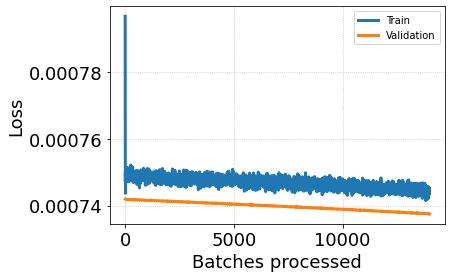

In [40]:
learn.recorder.plot_losses()
# plt.yscale('log')

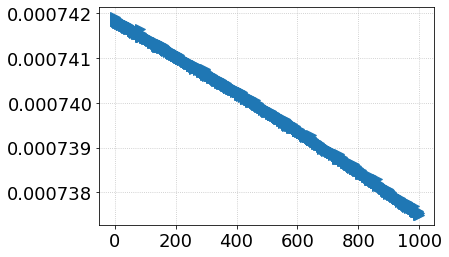

In [41]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [42]:
learn.save('AE_3D_200_no1cycle_custom_norm')

### 1000 more ...

In [ ]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000746,0.000738,00:02
1,0.000745,0.000738,00:02
2,0.000745,0.000737,00:02
3,0.000746,0.000738,00:02
4,0.000746,0.000737,00:02
5,0.000746,0.000738,00:02
6,0.000746,0.000737,00:02
7,0.000745,0.000738,00:02
8,0.000745,0.000738,00:02
9,0.000745,0.000737,00:03


In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [ ]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [ ]:
learn.save('AE_3D_200_no1cycle_custom_norm')

### Few more..

In [50]:
lr = 1e-4
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000540,0.000539,00:02
1,0.000539,0.000536,00:02
2,0.000538,0.000542,00:02
3,0.000539,0.000538,00:02
4,0.000539,0.000535,00:02
5,0.000539,0.000537,00:02
6,0.000539,0.000537,00:02
7,0.000539,0.000538,00:02
8,0.000539,0.000537,00:02
9,0.000539,0.000537,00:02


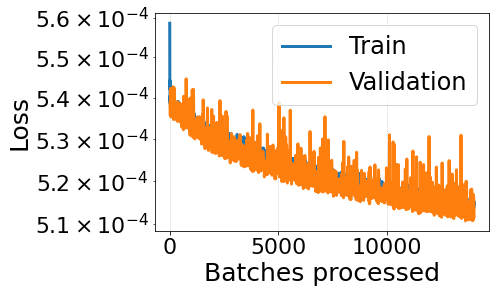

In [51]:
learn.recorder.plot_losses()
plt.yscale('log')

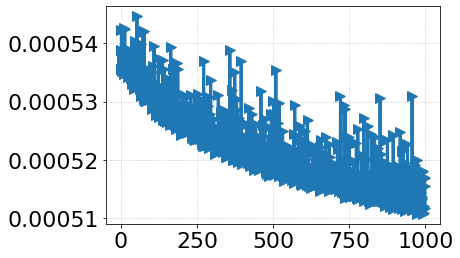

In [52]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [53]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [54]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000511,0.000511,00:02
1,0.000511,0.000510,00:02
2,0.000510,0.000510,00:02
3,0.000511,0.000510,00:02
4,0.000511,0.000510,00:02
5,0.000510,0.000510,00:02
6,0.000511,0.000510,00:02
7,0.000510,0.000510,00:02
8,0.000511,0.000510,00:02
9,0.000511,0.000510,00:02


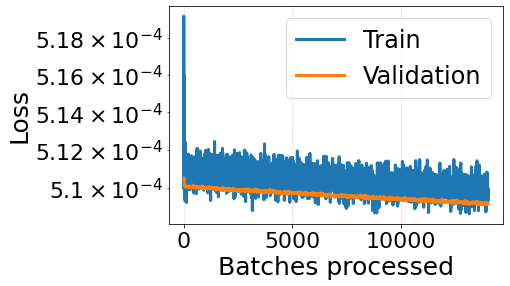

In [55]:
learn.recorder.plot_losses()
plt.yscale('log')

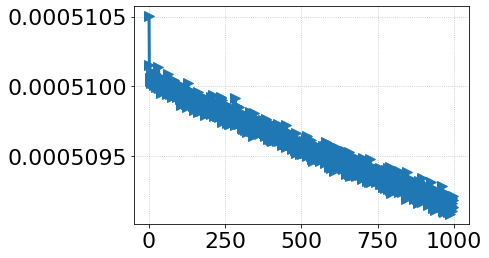

In [56]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [57]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [58]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000509,0.000509,00:02
1,0.000510,0.000509,00:02
2,0.000510,0.000509,00:02
3,0.000510,0.000509,00:02
4,0.000510,0.000509,00:02
5,0.000510,0.000509,00:02
6,0.000510,0.000509,00:02
7,0.000510,0.000509,00:02
8,0.000510,0.000509,00:02
9,0.000509,0.000509,00:02


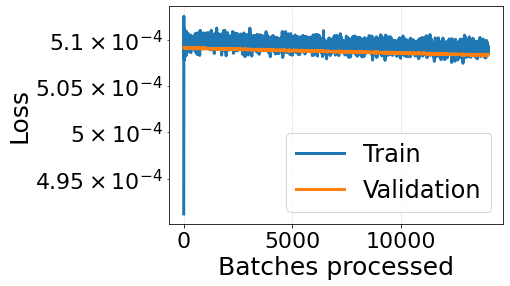

In [59]:
learn.recorder.plot_losses()
plt.yscale('log')

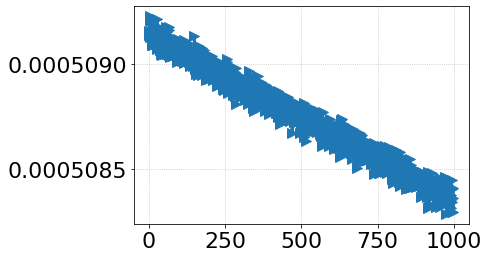

In [60]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [61]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [62]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000509,0.000508,00:02
1,0.000509,0.000508,00:02
2,0.000509,0.000508,00:02
3,0.000509,0.000508,00:02
4,0.000509,0.000508,00:02
5,0.000509,0.000508,00:02
6,0.000509,0.000508,00:02
7,0.000509,0.000508,00:02
8,0.000509,0.000508,00:02
9,0.000509,0.000508,00:02


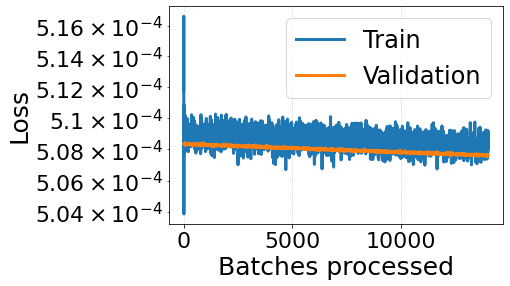

In [63]:
learn.recorder.plot_losses()
plt.yscale('log')

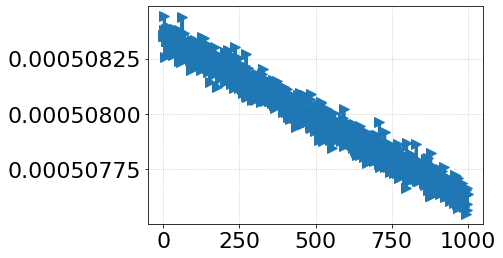

In [64]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [65]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [66]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000508,0.000508,00:02
1,0.000509,0.000508,00:02
2,0.000509,0.000508,00:02
3,0.000508,0.000508,00:02
4,0.000508,0.000508,00:02
5,0.000508,0.000508,00:02
6,0.000508,0.000508,00:02
7,0.000508,0.000508,00:02
8,0.000508,0.000508,00:02
9,0.000508,0.000508,00:02


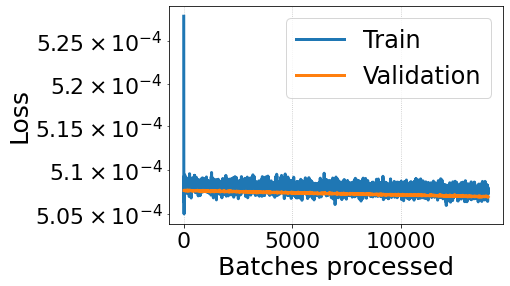

In [67]:
learn.recorder.plot_losses()
plt.yscale('log')

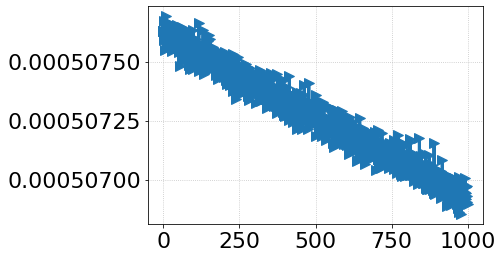

In [68]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [69]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [70]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000509,0.000507,00:02
1,0.000508,0.000507,00:02
2,0.000508,0.000507,00:02
3,0.000508,0.000507,00:02
4,0.000507,0.000507,00:02
5,0.000507,0.000507,00:02
6,0.000508,0.000507,00:02
7,0.000508,0.000507,00:02
8,0.000508,0.000507,00:02
9,0.000508,0.000507,00:02


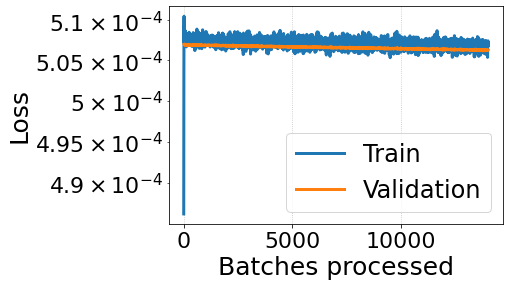

In [71]:
learn.recorder.plot_losses()
plt.yscale('log')

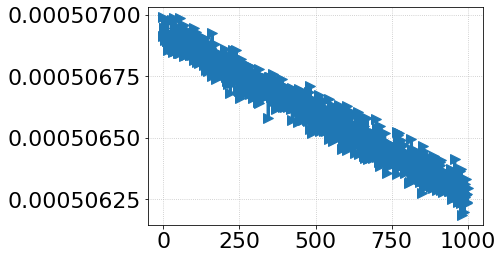

In [72]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [73]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [74]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000507,0.000506,00:02
1,0.000507,0.000506,00:02
2,0.000507,0.000506,00:02
3,0.000507,0.000506,00:02
4,0.000507,0.000506,00:02
5,0.000507,0.000506,00:02
6,0.000507,0.000506,00:02
7,0.000507,0.000506,00:02
8,0.000507,0.000506,00:02
9,0.000506,0.000506,00:02


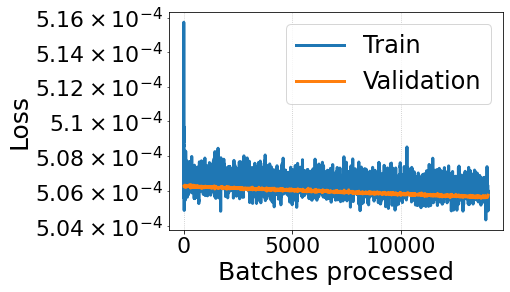

In [75]:
learn.recorder.plot_losses()
plt.yscale('log')

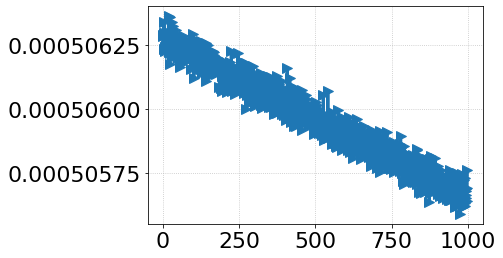

In [76]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [77]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [78]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000506,0.000506,00:02
1,0.000506,0.000506,00:02
2,0.000506,0.000506,00:02
3,0.000506,0.000506,00:02
4,0.000506,0.000506,00:02
5,0.000506,0.000506,00:02
6,0.000506,0.000506,00:02
7,0.000506,0.000506,00:02
8,0.000506,0.000506,00:02
9,0.000506,0.000506,00:02


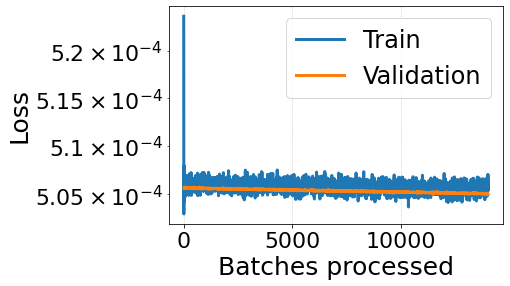

In [79]:
learn.recorder.plot_losses()
plt.yscale('log')

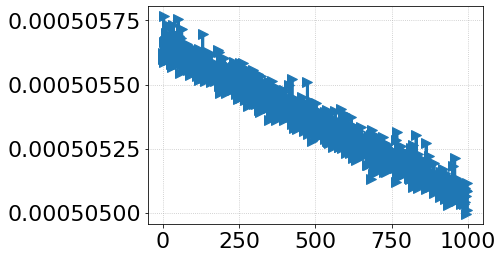

In [80]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [81]:
learn.save('AE_3D_200_no1cycle_custom_norm')

In [82]:
lr = 1e-6
learn.fit(1000, lr=lr, wd=wd)

epoch,train_loss,valid_loss,time
0,0.000506,0.000505,00:02
1,0.000507,0.000505,00:02
2,0.000506,0.000505,00:02
3,0.000506,0.000505,00:02
4,0.000506,0.000505,00:02
5,0.000506,0.000505,00:02
6,0.000506,0.000505,00:02
7,0.000505,0.000505,00:02
8,0.000505,0.000505,00:02
9,0.000505,0.000505,00:02


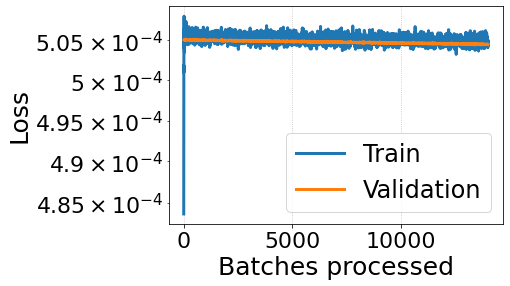

In [83]:
learn.recorder.plot_losses()
plt.yscale('log')

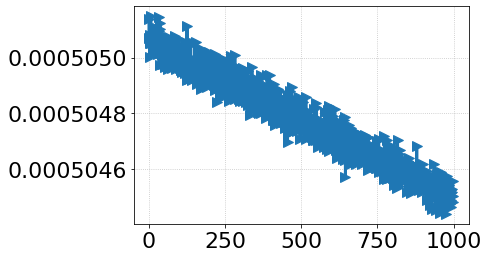

In [84]:
plt.plot(learn.recorder.val_losses, marker='>', label='Validation')
#plt.yscale('log')

In [85]:
learn.save('AE_3D_200_no1cycle_custom_norm')

## Test the model and build plots

In [13]:
learn.load('AE_3D_200_no1cycle_custom_norm')

Learner(data=DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f3a29262278>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f3a29262208>;

Test: None, model=AE_3D_200(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=100, bias=True)
  (en3): Linear(in_features=100, out_features=50, bias=True)
  (en4): Linear(in_features=50, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=50, bias=True)
  (de2): Linear(in_features=50, out_features=100, bias=True)
  (de3): Linear(in_features=100, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=MSELoss(), metrics=[], true_wd=True, bn_wd=False, wd=1e-06, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, 

### Evaluate on the test-set

In [14]:
learn.validate()

[0.0007314075]

In [15]:
curr_save_folder = 'plots/AE_3D_200_custom_norm/'

In [16]:
train.keys()

Index(['m', 'pt', 'phi', 'eta'], dtype='object')

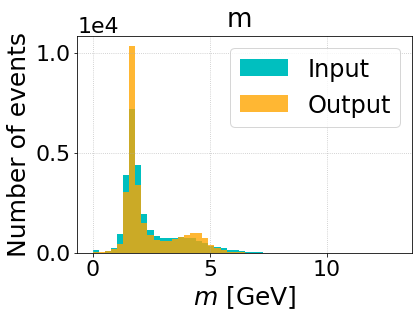

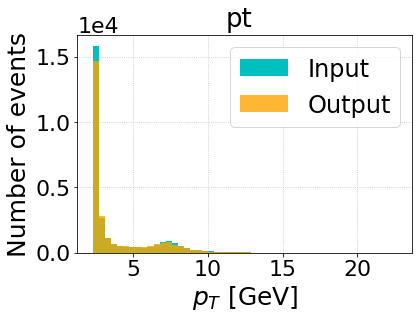

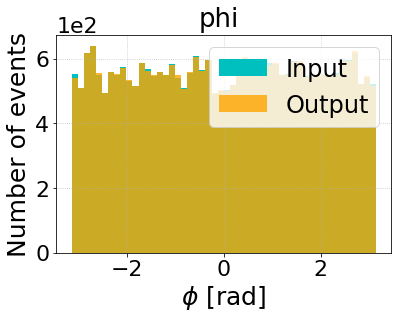

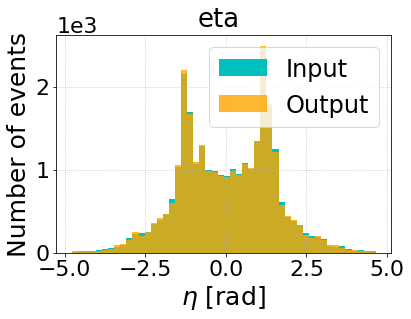

In [17]:
import utils
plt.close('all')
unit_list = ['[GeV]', '[GeV]', '[rad]', '[rad]']
variable_list = [ r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

# Histograms
idxs = (0, len(test))  # Choose events to compare
data = torch.tensor(test_x[idxs[0]:idxs[1]].values)
pred = model(data).detach().numpy()
pred = utils.custom_unnormalize_4m(pred)
data = utils.custom_unnormalize_4m(data.detach().numpy())

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train_x.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    # plt.yscale('log')
    plt.legend()
    fig_name = '200_cus_norm_hist_%s' % train.columns[kk]
    plt.savefig(curr_save_folder + fig_name)

m Mean:  0.010748194 \pm 0.0012005315614346047  Sigma:  0.20068637 \pm 0.0008488888176877372
pt Mean:  -0.000103989965 \pm 0.0001879242390164284  Sigma:  0.031414278 \pm 0.0001328801243438308
phi Mean:  0.00073831965 \pm 0.000495893388813158  Sigma:  0.082895815 \pm 0.0003506433064073154
eta Mean:  0.002638151 \pm 0.001487937555478638  Sigma:  0.24873047 \pm 0.0010521118892415251


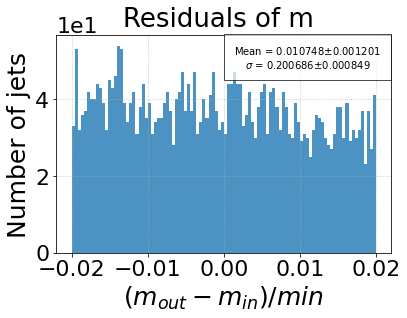

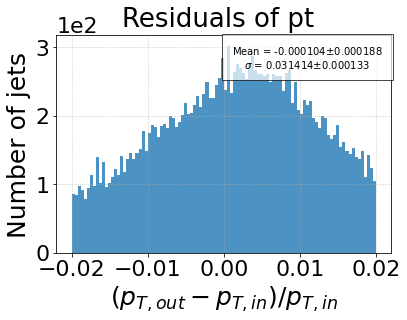

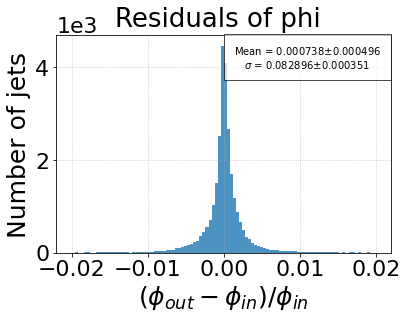

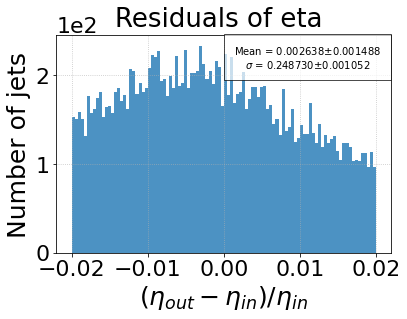

In [18]:
from scipy import stats
residual_strings = [r'$(m_{out} - m_{in}) / m{in}$',
                    r'$(p_{T,out} - p_{T,in}) / p_{T,in}$',
                    r'$(\phi_{out} - \phi_{in}) / \phi_{in}$',
                    r'$(\eta_{out} - \eta_{in}) / \eta_{in}$']

data[:,0][(data[:,0]<1e-3)] += 1
residuals = np.true_divide(pred - data, data)

range = (-.02, .02)
#range=None
for kk in np.arange(4):
    plt.figure()
    n_hist_pred, bin_edges, _ = plt.hist(
        residuals[:, kk], label='Residuals', linestyle=line_style[0], alpha=alph, bins=100, range=range)
    plt.suptitle('Residuals of %s' % train.columns[kk])
    plt.xlabel(residual_strings[kk])  # (train.columns[kk], train.columns[kk], train.columns[kk]))
    plt.ylabel('Number of jets')
    ms.sciy()
    #plt.yscale('log')
    std = np.std(residuals[:, kk])
    std_err = utils.std_error(residuals[:, kk])
    mean = np.mean(residuals[:, kk])
    sem = stats.sem(residuals[:, kk], nan_policy='omit')
    ax = plt.gca()
    print(train.columns[kk],'Mean: ', mean, '\pm', sem, ' Sigma: ', std, '\pm', std_err )
    plt.text(.75, .9, 'Mean = %f$\pm$%f\n$\sigma$ = %f$\pm$%f' % (mean, sem, std, std_err), bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10},
             horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)
    fig_name = '200_cus_norm_residual_%s' % train.columns[kk]
    plt.savefig(curr_save_folder + fig_name)

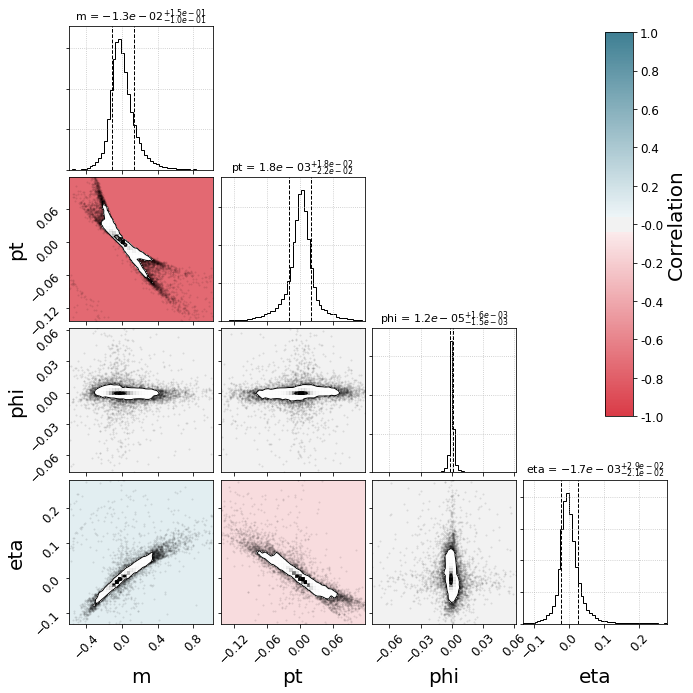

In [19]:
import corner.corner as corner
import seaborn as sns

res_df = pd.DataFrame({'m': residuals[:, 0], 'pt': residuals[:, 1], 'phi': residuals[:, 2], 'eta': residuals[:, 3]})
save = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
#cmap = 'RdBu'
norm = mpl.colors.Normalize(vmin=-1, vmax=1, clip=False)
mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

group = ['m', 'pt', 'phi', 'eta']

label_kwargs = {'fontsize': 20}
title_kwargs = {"fontsize": 11}
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
group_arr = res_df.values
corr = res_df.corr()
qs = np.quantile(group_arr, q=[.0025, .9975], axis=0)
ndim = qs.shape[1]
ranges = [tuple(qs[:, kk]) for kk in np.arange(ndim)]
figure = corner(group_arr, range=ranges, plot_density=True, plot_contours=True, no_fill_contours=False, #range=[range for i in np.arange(ndim)],
                bins=50, labels=group, label_kwargs=label_kwargs, #truths=[0 for kk in np.arange(qs.shape[1])],
                show_titles=True, title_kwargs=title_kwargs, quantiles=(0.16, 0.84),
                # levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.2e')
                levels=(1 - np.exp(-0.5), .90), fill_contours=False, title_fmt='.1e')

# # Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))
# Loop over the diagonal
linecol = 'r'
linstyl = 'dashed'
# Loop over the histograms
for yi in np.arange(ndim):
    for xi in np.arange(yi):
        ax = axes[yi, xi]
        # Set face color according to correlation
        ax.set_facecolor(color=mappable.to_rgba(corr.values[yi, xi]))
cax = figure.add_axes([.87, .4, .04, 0.55])
cbar = plt.colorbar(mappable, cax=cax, format='%.1f', ticks=np.arange(-1., 1.1, 0.2))
cbar.ax.set_ylabel('Correlation', fontsize=20)

if save:
    fig_name = '200_cus_norm_corner_3d.png'
    plt.savefig(curr_save_folder + fig_name)

#### Observe the correlation between \eta and m and the negative correlation between p_t and m that the network is able to capture.